In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [2]:
target = []
surfaces = []

# Load the data from CSV files for each surface

In [3]:
#for i in range(1, 75):  #92
#    filename = 'D:\FYP\ML\AI Model\sliced_data\S1\Surface_01 ' + str(i) +'.csv'
#    df = pd.read_csv(filename)
#    df = df.drop('Impedence_Vel', axis=1)
#    df = df.drop('Impdence_Pos', axis=1)
#    surfaces.append(df.values)
#    target.append('Surface 1')   


In [4]:
#df.keys()

In [5]:
#surfaces.isnull().sum()
#np.isnan(df).sum()

In [6]:
for i in range(1, 75):  #107
    filename = 'D:\FYP\ML\AI Model\sliced_data\S2\Surface_02_' + str(i) +'.csv'
    df = pd.read_csv(filename, header=0)
    df = df.drop('Impedence_Vel', axis=1)
    df = df.drop('Impdence_Pos', axis=1)
    surfaces.append(df.values)
    target.append('Surface 2')

In [7]:
for i in range(1, 75):  #105
    filename = 'D:\FYP\ML\AI Model\sliced_data\S3\Surface_03_' + str(i) +'.csv'
    df = pd.read_csv(filename, header=0)
    df = df.drop('Impedence_Vel', axis=1)
    df = df.drop('Impdence_Pos', axis=1)
    surfaces.append(df.values)
    target.append('Surface 3')

In [8]:
# extract the time series data and the corresponding labels
X = np.array(surfaces)
X = X.reshape(X.shape[0], -1)

y = np.array(target)

In [9]:
#pd.Series(surfaces).isnull().sum()

In [10]:
X

array([[ 0.00000000e+00,  0.00000000e+00,  9.27298379e+01, ...,
         8.48443000e-01,  2.63157895e-02,  1.00000000e-01],
       [ 0.00000000e+00,  0.00000000e+00,  7.83784557e+01, ...,
         8.48751000e-01,  3.57894737e-02,  1.00000000e-01],
       [ 0.00000000e+00,  0.00000000e+00,  6.87578646e+00, ...,
         8.48821000e-01,  2.57894737e-02,  1.00000000e-01],
       ...,
       [ 0.00000000e+00,  0.00000000e+00, -2.73137274e+01, ...,
         1.48528100e+00,  4.42011250e-02,  1.75000000e-01],
       [ 0.00000000e+00,  0.00000000e+00, -6.82221163e+01, ...,
         1.48488800e+00,  1.57894737e-02,  1.75000000e-01],
       [ 0.00000000e+00,  0.00000000e+00, -7.07919924e+01, ...,
         1.48484100e+00,  3.63157895e-02,  1.75000000e-01]])

In [11]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
X_train

array([[ 0.00000000e+00,  0.00000000e+00, -8.20995234e+01, ...,
         8.48374000e-01,  3.10526316e-02,  1.00000000e-01],
       [ 0.00000000e+00,  0.00000000e+00, -1.39294185e+02, ...,
         1.27275800e+00,  1.00000000e-02,  1.50000000e-01],
       [ 0.00000000e+00,  0.00000000e+00, -1.13180267e+02, ...,
         8.48523000e-01,  2.05263158e-02,  1.00000000e-01],
       ...,
       [ 0.00000000e+00,  0.00000000e+00, -1.41161106e+01, ...,
         8.48638000e-01,  1.05263158e-02,  1.00000000e-01],
       [ 0.00000000e+00,  0.00000000e+00, -5.02106768e+00, ...,
         8.48573000e-01,  1.05263158e-02,  1.00000000e-01],
       [ 0.00000000e+00,  0.00000000e+00, -1.69268827e+01, ...,
         8.48539000e-01,  1.05263158e-02,  1.00000000e-01]])

In [12]:
# initialize and fit the TSF classifier
model = RandomForestClassifier(n_estimators=5000, random_state=42)
for i in range(0,2):
    model.fit(X_train, y_train)

In [13]:
# predict the class labels of new data
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.7972972972972973

[[32  8]
 [ 7 27]]
Confusion matrix, without normalisation
[[32  8]
 [ 7 27]]


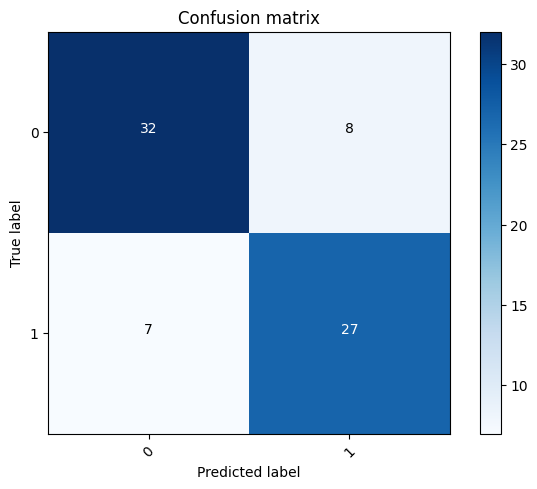

In [14]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, 
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalised confusion matrix")
  else:
    print("Confusion matrix, without normalisation")

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max()/2.
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, format(cm[i,j], fmt),
        horizontalalignment='center',
        color="white" if cm[i, j] > thresh else "black")




p_test = model.predict(X_test)
cm = confusion_matrix(y_test, p_test)
print(cm)

plot_confusion_matrix(cm, list(range(2)))
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
